## Introduction
In this activity, we're going to use decision tree's to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard. We will learn how to assess the accuracy of the decision trees predictions and have a look at validation of our model.

We will also have a quick look at how this problem might be approached without using machine learning. This will highlight some of the limitations of the classical approach and demonstrate why a machine learning approach is ideal for this type of problem.


This activity is based on the scikit-learn example on Photometric Redshifts of Galaxies.

## Magnitudes and colours
We will be using flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).

<img src="plot_sdss_filters_11.png">

The astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

This index is one way to characterise the colours of galaxies. For example, if the u-g index is high then the object is brighter in ultra violet frequencies than it is in visible green frequencies.

Colour indices act as an approximation for the spectrum of the object and are useful for classifying stars into different types.

## What data do we need?
To calculate the redshift of a distant galaxy, the most accurate method is to observe the optical emission lines and measure the shift in wavelength. However, this process can be time consuming and is thus infeasible for large samples.

For many galaxies we simply don't have spectroscopic observations.

Instead, we can calculate the redshift by measuring the flux using a number of different filters and comparing this to models of what we expect galaxies to look like at different redshifts.

In this activity, we will use machine learning to obtain photometric redshifts for a large sample of galaxies. We will use the colour indices (u-g, g-i, r-i and i-z) as our input and a subset of sources with spectroscopic redshifts as the training dataset.

## Decision tree algorithms
Decision trees are a tool that can be used for both classification and regression. In this module we will look at regression, however, in the next module we will see how they can be used as classifiers.

Decision trees map a set of input features to their corresponding output targets. This is done through a series of individual decisions where each decision represents a node (or branching) of the tree.

The following figure shows the decision tree our proverbial robot tennis player Robi used in the lectures to try and decide whether to play tennis on a particular day.

<img src="tennis.png">

Each node represents a decision that the robot needs to make (or assess) to reach a final decision. In this example, the decision tree will be passed a set of input features (Outlook, Humidity and Wind) and will return an output of whether to play or not.

## Decision trees for regression
In decision trees for real-world tasks, each decision is typically more complex, involving measured values, not just categories.

Instead of the input values for humidity being Normal or High and wind being Strong or Weak we might see a percentage between 0 and 100 for humidity and a wind speed in km/hr for wind. Our decisions might then be humidity < 40% or wind < 5 km/hr.

The output of regression is a real number. So, instead of the two outputs of Play and Don't Play we have a probability of whether we will play that day.

The decision at each branch is determined from the training data by the decision tree learning algorithm. Each algorithm employs a different metric (e.g. Gini impurity or information gain) to find the decision that splits the data most effectively.

For now, just need to know that a decision tree is a series of decisions, each made on a single feature of the data. The end point of all the branches is a set of desired target values.

## Decision trees in Python
Our training data uses accurate spectroscopic measurements.

The decision tree will look something like the following.

<img src = "decisiontree.png">

We can see how our calculated colour indices are input as features at the top and through a series of decision nodes a target redshift value is reached and output.

We will be using the Python machine learning library scikit-learn which provides several machine learning algorithms.

The scikit-learn decision tree regression takes a set of input features and the corresponding target values, and constructs a decision tree model that can be applied to new data.

## Sloan Digital Sky Survey data
We have provided the Sloan data in NumPy binary format (.npy) in a file called sdss_galaxy_colors.npy. The Sloan data is stored in a NumPy structured array and looks like this:

In [8]:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data[0:5])

[ ( 19.84132,  19.52656,  19.46946,  19.17955,  19.10763, b'QSO',  0.539301  ,   6.54362200e-05)
 ( 19.86318,  18.66298,  17.84272,  17.38978,  17.14313, b'GALAXY',  0.1645703 ,   1.18662500e-05)
 ( 19.97362,  18.31421,  17.47922,  17.0744 ,  16.76174, b'GALAXY',  0.04190006,   2.18378800e-05)
 ( 19.05989,  17.49459,  16.59285,  16.09412,  15.70741, b'GALAXY',  0.04427702,   1.06268700e-05)
 ( 19.45567,  18.33084,  17.67185,  17.30189,  17.1365 , b'GALAXY',  0.04164413,   1.76680700e-05)]


In [9]:
print(data[0])

( 19.84132,  19.52656,  19.46946,  19.17955,  19.10763, b'QSO',  0.539301,   6.54362200e-05)


In [10]:
print(data['u'])

[ 19.84132  19.86318  19.97362 ...,  19.82667  19.98672  18.00024]


Each flux magnitude column can be accessed in the data array as data['u'], data['g'] etc. The redshifts can accessed with data['redshift'].

## Features and Targets
Write a get_features_targets function that splits the training data into input features and their corresponding targets. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.

Your function should return a tuple of:

- features: a NumPy array of dimensions m ⨉ 4, where m is the number of galaxies;
- targets: a 1D NumPy array of length m, containing the redshift for each galaxy.
The data argument will be the structured array described on the previous slide. The u flux magnitudes and redshifts can be accessed as a column with data['u'] and data['redshift'].

The four features are the colours u - g, g - r, r - i and i - z. To calculate the first column of features, subtract the u and g columns, like this:

In [11]:
import numpy as np
data = np.load('sdss_galaxy_colors.npy')
print(data['u'] - data['g'])

[ 0.31476  1.2002   1.65941 ...,  1.72629  0.23287  0.19067]


In [13]:
#helper function
import numpy as np

def get_features_targets(data):
  # complete this function
  features = np.zeros((data.shape[0], 4))
  features[:,0] = data['u']-data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets = data['redshift']
  return features, targets

In [15]:
 # load the data
data = np.load('sdss_galaxy_colors.npy')

In [16]:
# call our function 
features, targets = get_features_targets(data)

In [17]:
# print the shape of the returned arrays
print(features[:2])
print(targets[:2])

[[ 0.31476  0.0571   0.28991  0.07192]
 [ 1.2002   0.82026  0.45294  0.24665]]
[ 0.539301   0.1645703]


## Descision Tree Regressor
We are now going to use our features and targets to train a decision tree and then make a prediction. We are going to use the DecisionTreeRegressor class from the sklearn.tree module.

Your task is to put this together for our photometric redshift data. Copy your get_features_targets from the previous problem. Use the comments to guide your implementation.

Finally, print the first 4 predictions. It should print this:


[ 0.539301    0.1645703   0.04190006  0.04427702]

In [18]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [19]:
# load the data and generate the features and targets
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)
  

In [20]:
# initialize model
dtr = DecisionTreeRegressor()

In [21]:
# train the model
dtr.fit(features, targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [22]:
# make predictions using the same features
predictions = dtr.predict(features)

In [23]:
# print out the first 4 predicted redshifts
print(predictions[:4])

[ 0.539301    0.1645703   0.04190006  0.04427702]


## Evaluating our results: accuracy
So we trained a decision tree! Great...but how do we know if the tree is actually any good at predicting redshifts?

In regression we compare the predictions generated by our model with the actual values to test how well our model is performing. The difference between the predicted values and actual values (sometimes referred to as residuals) can tell us a lot about where our model is performing well and where it is not.

While there are a few different ways to characterise these differences, in this tutorial we will use the median of the differences between our predicted and actual values. 

In [24]:
#helper function
def median_diff(predicted, actual):
  diff =  predicted - actual
  abs_diff = np.abs(diff)
  return np.median(abs_diff)

## Evaluating our results: validation
We previously used the same data for training and testing our decision trees.

This gives an unrealistic estimate of how accurate the model will be on previously unseen galaxies because the model has been optimised to get the best results on the training data.

The simplest way to solve this problem is to split our data into training and testing subsets:


 #initialise and train the decision tree
dtr = DecisionTreeRegressor()
dtr.fit(train_features, train_targets)
​
#get a set of prediction from the test input features
predictions = dtr.predict(test_features)
​
#compare the accuracy of the pediction againt the actual values

print(calculate_rmsd(predictions, test_targets))

This method of validation is the most basic approach to validation and is called held-out validation. We will use the med_diff accuracy measure and hold-out validation in the next problem to assess the accuracy of our decision tree.

## Validating our model
In this problem, we will use median_diff from the previous question to validate the decision tree model. Your task is to complete the validate_model function.

The function should split the features and targets into train and test subsets, like this 50:50 split for features:


split = features.shape[0]//2

train_features = features[:split]

test_features = features[split:]

Your function should then use the training split (train_features and train_targets) to train the model.

Finally, it should measure the accuracy of the model using median_diff on the test_targets and the predicted redshifts from test_features.

The function should take 3 arguments:

 - model: the decision tree regressor;

 - features - the features for the data set;

 - targets - The targets for the data set.

In [25]:
##helper function
# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
  # split the data into training and testing features and predictions
  
  split_index = int(0.5 * len(features))
  #split = features.shape[0]//2
  train_features = features[:split_index]
  test_features = features[split_index:]
  train_targets = targets[:split_index]
  test_targets = targets[split_index:]
  # train the model
  model.fit(train_features,train_targets)
  # get the predicted_redshifts
  predictions = model.predict(test_features)
  # use median_diff function to calculate the accuracy  
  return median_diff(predictions, test_targets)


In [26]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)


In [27]:
# initialize model
dtr = DecisionTreeRegressor()

In [28]:
# validate the model and print the med_diff
diff = validate_model(dtr, features, targets)
print('Median difference: {:f}'.format(diff))

Median difference: 0.021961


## Exploring the output tree
But what does the decision tree actually look like?



<img src="decision_tree.jpg">

You can see how the decision is made at each node as well as the number of samples which reach that node

In [41]:
import pydotplus as pydotplus
from sklearn.tree import DecisionTreeRegressor,export_graphviz


In [42]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

In [43]:
# Initialize model
dtr = DecisionTreeRegressor(max_depth=3) 

In [44]:
# Split the data into training and testing
split_index = int(0.5 * len(features))
train_features = features[:split_index]
train_targets = targets[:split_index]

In [45]:
dtr.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [50]:
dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_jpg("decision_tree.jpg")

True

The median of differences of~ 0.02 . This means that half of our galaxies have a error in the prediction of < 0.02, which is pretty good. One of the reason we chose the median of differences as our accuracy measure is that it gives a fair representation of the errors especially when the distribution of errors is skewed. The graph below shows the distribution of residuals (differences) for our model along with the median and interquartile values.

<img src="residuals.png">

As you can tell the distribution is very skewed, but the tail of the distribution goes all the way out to 6.

## The effect of training set size

The number of galaxies we use to train the model has a big impact on how accurate our predictions will be. This is the same with most machine learning methods: the more data that they are trained with, the more accurate their prediction will be.

Here is how our median difference changes with training set size:

Training galaxies	median_diff

50	0.048

500	0.026

5000	0.023

50000	0.022

Understanding how the accuracy of the model changes with sample size is important to understanding the limitations of our model. We are approaching the accuracy limit of the decision tree model (for our redshift problem) with a training sample size of 25,000 galaxies.

The only way we could further improve our model would be to use more features. This might include more colour indices or even the errors associated with the measured flux magnitudes.

## Before machine learning

Before machine learning, we would have tried to solve this problem with regression — by constructing an empirical model to predict how the dependent variable (redshift) varies with one or more independent variables (the colour indices).

A plot of how the colours change with redshift tells us that it is quite a complex function, for example redshift versus u - g:

<img src='redshift-U-G.png'>

One approach would be to construct a multi-variate non-linear regression model. Perhaps using a least squares fitting to try and determine the best fit parameters. The model would be quite complex; based on the above plot, a dampened inverse sine function would be a good starting point for such a model.

While we could try such an approach the function would be overly complex and there is no guarantee that it would yield very promising results. Another approach would be to plot a colour-index vs colour-index plot using an additional colour scale to show redshift. The following plot is an example of such a plot.

<img src='redshift-colour-colour.png'>

It shows that we get reasonably well defined regions where redshifts are similar. If we were to make a contour map of the redshifts in the colour index vs colour index space we would be able to get an estimate of the redshift for new data points based on a combination of their colour indices. This would lead to redshift estimates with significant uncertainties attached to them.

In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
data = np.load('sdss_galaxy_colors.npy')
# Get a colour map
cmap = plt.get_cmap('YlOrRd')

In [57]:
# Define our colour indexes u-g and r-i
features = np.zeros((data.shape[0], 4))
features[:, 0] = data['u'] - data['g']
features[:, 2] = data['r'] - data['i']

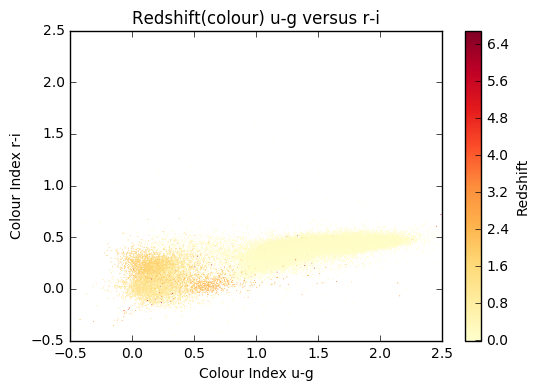

In [60]:
fig , ax = plt.subplots()
plt.axis([-0.5,2.5,-0.5,2.5])
    
# Define your axis labels and plot title
    
plt.xlabel('Colour Index u-g')
plt.ylabel('Colour Index r-i')
plt.title('Redshift(colour) u-g versus r-i')
# Set any axis limits
cf = ax.scatter(features[:,0],features[:,2],c=targets, s=0.5, lw=0, cmap=cmap)
cbar = plt.colorbar(cf)
cbar.set_label('Redshift')
plt.show()

## Summary
In this activity, we implemented some decision tree models to help predict the redshift of galaxies based on their measured colour indices. We learnt that there are several ways to assess the accuracy of the model and in our validations we used the median of the residuals.

We touched on how the problem might be approached without machine learning and found that there isn't too much available that can be simply used.

We also learnt why we need to cross validate the model and that this is done by splitting the data into seperate training and testing subsets. We will look at k-fold cross validation in the next tutorial; where the testing and training are changed to include various combinations of  seperate subsets.

